## Setting Up the Ratings Data

In [1]:
import pandas as pd
import numpy as np

In [3]:
with open('data/movies.txt', 'r') as f:
    movies = f.read().split('\r')
with open ('data/data.txt', 'r') as f:
    ratings = f.read().split('\r')

In [4]:
movies_list = []
for m in movies:
    movies_list.append(m.split('\t'))

ratings_list = []
for r in ratings:
    ratings_list.append(r.split('\t'))


In [5]:
movies_df = pd.DataFrame(movies_list, columns = ['Movie Id', 'Movie Title', 'Unknown', 'Action', 'Adventure', 'Animation',\
                                                 'Childrens', 'Comedy', 'Crime', 'Documentary', \
                                                 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', \
                                                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

ratings_df =  pd.DataFrame(ratings_list, columns = ['User Id', 'Movie Id', 'Rating'])

In [6]:
movies_df =  movies_df.apply(pd.to_numeric, errors='ignore')
ratings_df = ratings_df.apply(pd.to_numeric)

In [8]:
movies_df.head()

,Movie Id,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [511]:
ratings_df.head()

,User Id,Movie Id,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [512]:
r_df = ratings_df.pivot(index = 'Movie Id', columns ='User Id', values = 'Rating').fillna(0)

In [513]:
r_df.head()

User Id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
Movie Id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [514]:
ratings_matrix = r_df.as_matrix()

In [515]:
ratings_matrix

array([[ 5.,  4.,  0., ...,  5.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  5.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [516]:
np.savetxt('data/ratings.out', ratings_matrix, delimiter=',')

In [517]:
ratings_matrix = np.loadtxt('data/ratings.out',delimiter=',')

In [518]:
ratings_matrix

array([[ 5.,  4.,  0., ...,  5.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  5.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## Basic Visualization

In [519]:
import matplotlib.pyplot as plt
% matplotlib inline

In [520]:
counts = pd.value_counts(ratings_df['Rating'].values, sort=False)

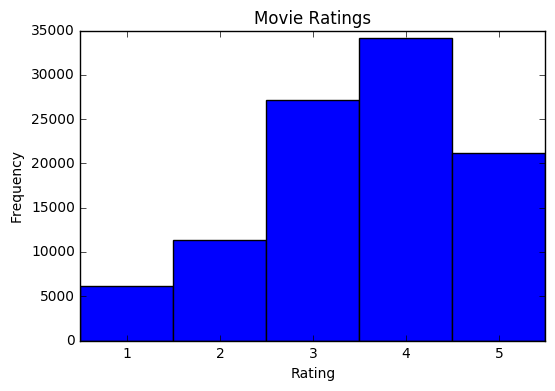

In [521]:
width = 1

plt.bar(np.arange(5), counts, width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_all.png')
plt.show()

### Visualize for Ten Most Popular Movies

In [522]:
r_df['Total Ratings'] = (r_df != 0).sum(axis=1)

In [523]:
r_df.sort_values('Total Ratings', ascending=False)[:10]

User Id,1,2,3,4,5,6,7,8,9,10,...,935,936,937,938,939,940,941,942,943,Total Ratings
Movie Id,,,,,,,,,,,,,,,,,,,,,
50,5.0,5.0,0.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,...,0.0,4.0,5.0,5.0,0.0,4.0,0.0,5.0,4.0,583
258,5.0,3.0,2.0,5.0,0.0,2.0,4.0,5.0,0.0,0.0,...,0.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,0.0,509
100,5.0,5.0,0.0,0.0,5.0,5.0,5.0,0.0,0.0,5.0,...,3.0,4.0,3.0,5.0,0.0,3.0,0.0,0.0,5.0,508
181,5.0,0.0,4.0,0.0,5.0,0.0,3.0,4.0,0.0,0.0,...,4.0,4.0,0.0,5.0,0.0,3.0,5.0,0.0,4.0,507
294,0.0,1.0,2.0,5.0,0.0,2.0,1.0,3.0,4.0,3.0,...,0.0,3.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,485
286,0.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0,5.0,4.0,...,5.0,5.0,4.0,3.0,0.0,3.0,0.0,0.0,0.0,481
288,0.0,3.0,2.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,478
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,452
300,0.0,4.0,2.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,...,4.0,3.0,4.0,3.0,0.0,5.0,4.0,5.0,0.0,431


In [524]:
ten_most_popular = r_df.sort_values('Total Ratings', ascending=False)[:10].index

In [525]:
ten_most_popular

Int64Index([50, 258, 100, 181, 294, 286, 288, 1, 300, 121], dtype='int64', name=u'Movie Id')

In [526]:
most_popular_df = ratings_df[ratings_df['Movie Id'].isin(ten_most_popular)]

In [527]:
most_popular_df.head()

,User Id,Movie Id,Rating
24,308,1,4
50,251,100,4
53,25,181,5
61,20,288,1
100,32,294,3


In [528]:
counts = pd.value_counts(most_popular_df['Rating'].values, sort=False)

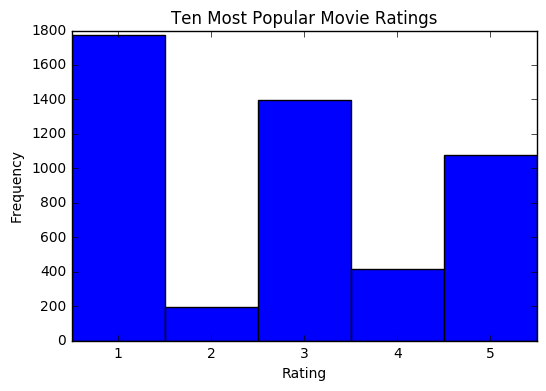

In [529]:
width = 1

plt.bar(np.arange(5), counts, width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Ten Most Popular Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_popular.png')
plt.show()

### Visualize for Ten Best Movies

Found 10 most highly rated movies, but only among movies that had $\geq$ 5 ratings. Otherwise, many movies with only 1 or 2 ratings that were 5 would be selected.

In [538]:
r_filtered_df = r_df[r_df['Total Ratings'] >= 5].drop(['Total Ratings'], axis=1)

In [539]:
r_filtered_df['Average Rating'] = r_filtered_df.replace(0, np.nan).mean(axis=1)

In [540]:
r_filtered_df.sort_values(['Average Rating'], ascending=False)[:10]

User Id,1,2,3,4,5,6,7,8,9,10,...,935,936,937,938,939,940,941,942,943,Average Rating
Movie Id,,,,,,,,,,,,,,,,,,,,,
1449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.625000
408,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,4.491071
318,0.0,0.0,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,4.466443
169,5.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.466102
483,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.456790
114,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.447761
64,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.445230
603,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387560
12,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,4.385768


In [541]:
ten_best = r_filtered_df.sort_values(['Average Rating'], ascending=False)[:10].index

In [542]:
ten_best

Int64Index([1449, 408, 318, 169, 483, 114, 64, 603, 12, 50], dtype='int64', name=u'Movie Id')

In [543]:
best_df = ratings_df[ratings_df['Movie Id'].isin(ten_best)]

In [544]:
counts = pd.value_counts(best_df['Rating'].values, sort=False)

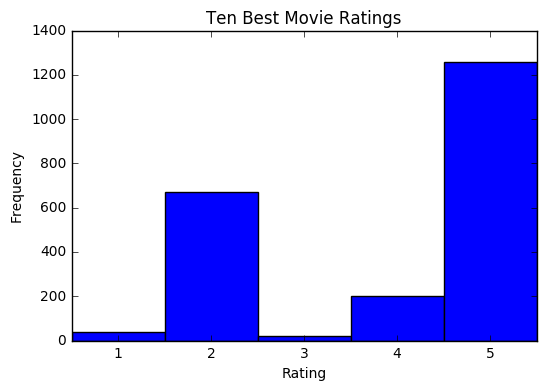

In [545]:
width = 1

plt.bar(np.arange(5), counts, width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Ten Best Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_best.png')
plt.show()

### Visualize for 3 Random Genres

In [546]:
genres = ['Drama', 'Comedy', 'Thriller'] #top 3 most popular genres

In [547]:
drama_movies = movies_df[movies_df['Drama'] == 1]['Movie Id']

In [548]:
len(drama_movies)

725

In [549]:
drama_df = ratings_df[ratings_df['Movie Id'].isin(drama_movies)]

In [550]:
counts = pd.value_counts(drama_df['Rating'].values, sort=False)

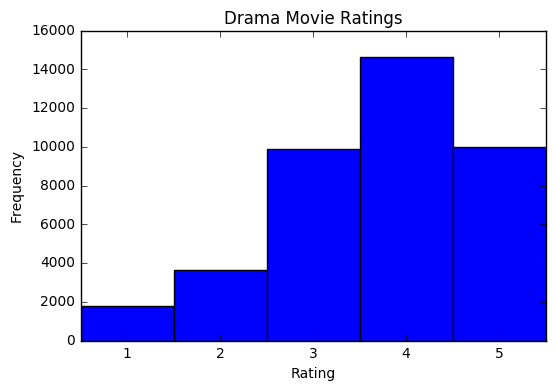

In [551]:
width = 1

plt.bar(np.arange(5), counts, width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Drama Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_drama.png')
plt.show()

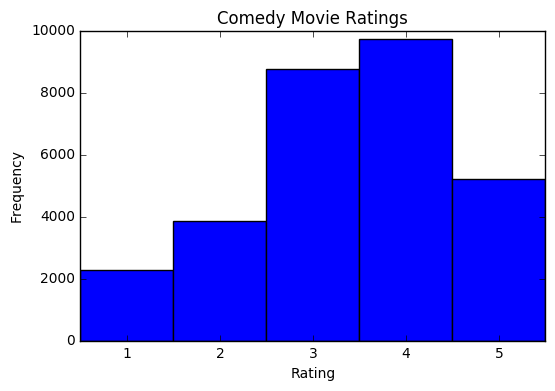

In [552]:
comedy_movies = movies_df[movies_df['Comedy'] == 1]['Movie Id']
comedy_df = ratings_df[ratings_df['Movie Id'].isin(comedy_movies)]

counts = pd.value_counts(comedy_df['Rating'].values, sort=False)

width = 1

plt.bar(np.arange(5), counts, width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Comedy Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_comedy.png')
plt.show()

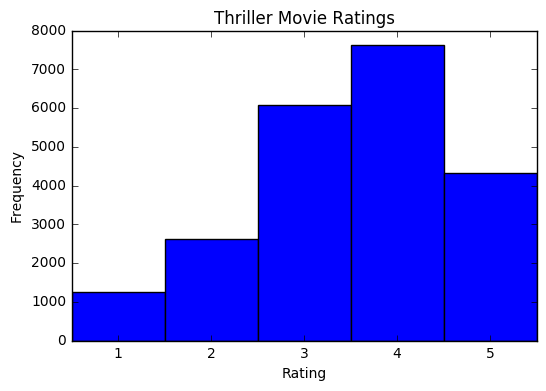

In [553]:
thriller_movies = movies_df[movies_df['Thriller'] == 1]['Movie Id']
thriller_df = ratings_df[ratings_df['Movie Id'].isin(thriller_movies)]

counts = pd.value_counts(thriller_df['Rating'].values, sort=False)

width = 1

plt.bar(np.arange(5), counts, width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Thriller Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_thriller.png')
plt.show()